In [ ]:
!pip install mplfinance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
import plotly.subplots as make_subplots

In [ ]:
from plotly.subplots import make_subplots

In [ ]:
#YF: API que contem dados de ações de bolsas abertas
#API: interface que conecta o código a alguma base de dados
df_dados = yf.download('PETR4.SA',start = '2023-01-01', end = '2023-12-31')
df_dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343063,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


In [ ]:
#Renomear colunas
df_dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_Ajust', 'Volume']
df_dados

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343063,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


In [ ]:
df_dados = df_dados.rename_axis('Data')
df_dados

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Data,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343063,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


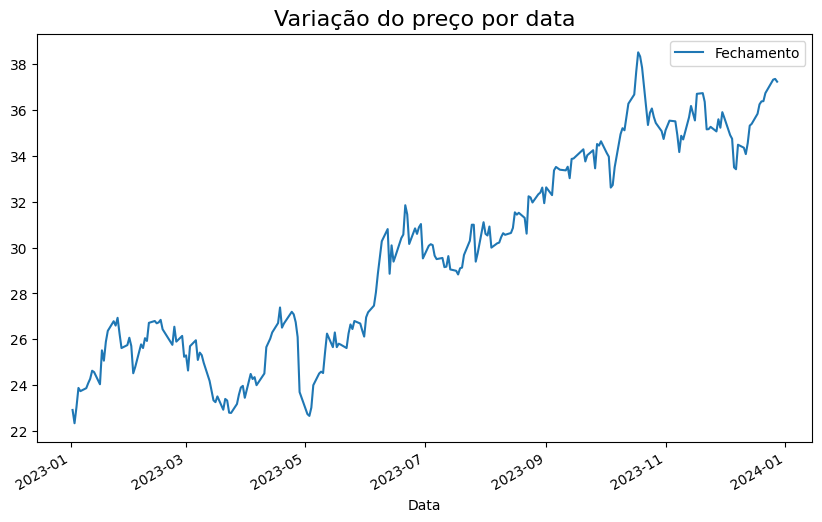

In [ ]:
#Gerando o grafico de fechamento (figzise é a dimensão do gráfico)
df_dados['Fechamento'].plot(figsize = (10,6))
plt.title('Variação do preço por data', fontsize = 16)
plt.legend(['Fechamento'])

In [ ]:
df = df_dados.head(60).copy()
# Convertendo o indice em uma coluna de data
df['Data'] = df.index
# Convertendo as datas para o formato de matplolib
# Isso é necessário para que o Matplotlib possa plotar as datas corretamente no gráfico
# Mdates é um método do MatplotLib para manipulação de datas
df['Data'] = df['Data'].apply(mdates.date2num)
df

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume,Data
Data,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700,19359.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300,19360.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000,19361.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000,19362.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343063,51851500,19363.0
2023-01-09,23.500000,24.000000,23.250000,23.870001,18.443510,46385200,19366.0
2023-01-10,23.950001,24.110001,23.370001,24.090000,18.613495,52741100,19367.0
2023-01-11,24.150000,24.620001,24.049999,24.280001,18.760302,53536500,19368.0
2023-01-12,24.290001,24.650000,24.110001,24.629999,19.030735,58130000,19369.0


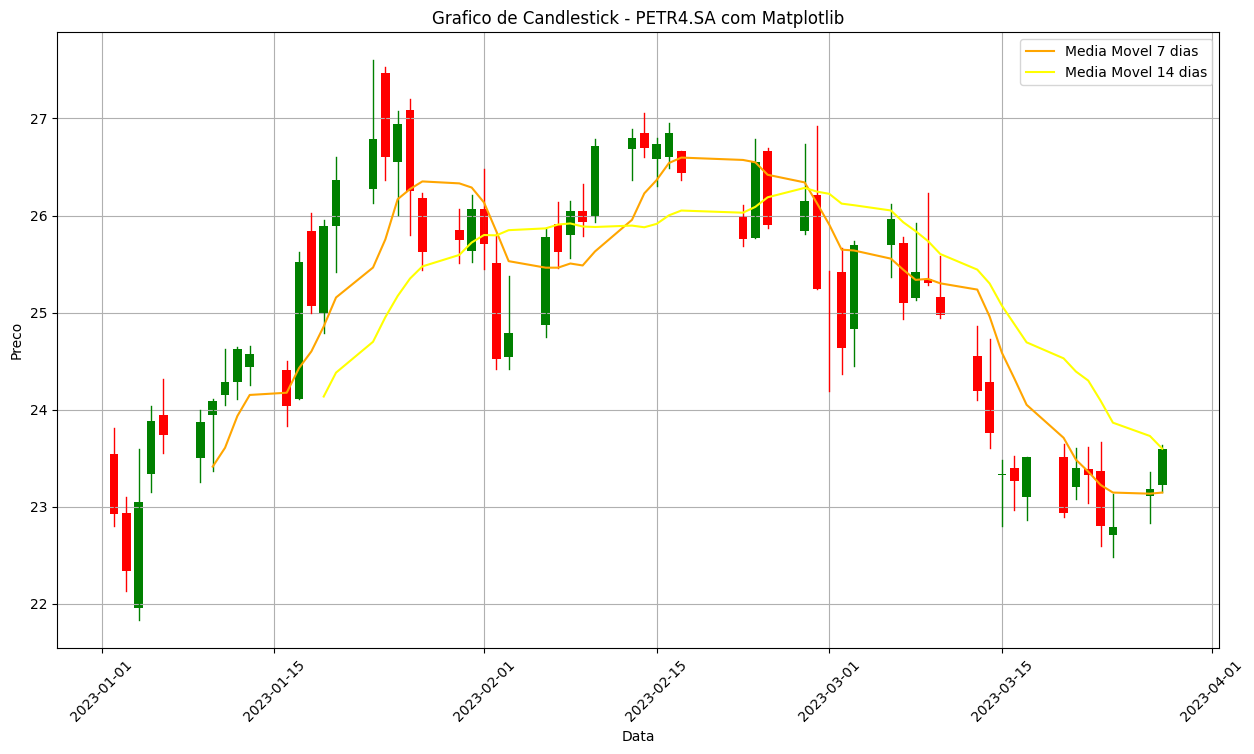

In [ ]:
# Criando um grafico em branco
fig, ax = plt.subplots(figsize = (15,8))

# Vamos definir a largura dos candles no grafico
width = 0.7

# Estrutura de repetição
for i in range(len(df)):
  # Determinando a cor do candle
  # Se o preço de fechamento for maior que o de abertura, o candle é verde (a ação valorizou nesse dia)
  # Se for menor, o candle é vermelho (a ação desvalorizou)
  if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]:
    color = 'green'
  else:
    color = 'red'

  # Desenhando a linha vertical do candle (mecha)
  # Essa linha mostra os preços máximos (topo da linha) e mínimo (base da linha) do dia
  # [df['Data'].iloc[i], df['Data'].iloc[i]] define o ponto x de linha (a data), e [df['Minimo'].iloc[i], df['Maximo'].iloc[i]] define a
  ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
          [df['Minimo'].iloc[i], df['Maximo'].iloc[i]],
          color=color,
          linewidth=1)

  # Adicionar os retangulos
  ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                             width,
                             abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                             facecolor=color))

# Adicionar as medias moveis
df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()
# Plotando as medias moveis
ax.plot(df['Data'], df['MA7'], color='orange', label='Media Movel 7 dias') # Media de 7 dias
ax.plot(df['Data'], df['MA14'], color='yellow', label='Media Movel 14 dias') # Media de 14 dias
# Adicionando legendas para as medias moveis
ax.legend()

# Formatando o eixo x para mostrar as datas
# Configuramos o formato da data e a rotacao para melhor legibilidade
ax.xaxis_date() #O metodo xaxis_date() e usado para dizer ao Matplotlib que as datas estao sendo usadas no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adicionando titulo e rotulos para os eixos x e y
plt.title('Grafico de Candlestick - PETR4.SA com Matplotlib')
plt.xlabel('Data')
plt.ylabel('Preco')

# Adicionando uma grade para facilitar a visualizacao dos valores
plt.grid(True)

#Exibindo o grafico
plt.show()

In [ ]:
# Criando subplots
'''
"Primeiro, criamos uma figura que contera nossos graficos usando make_subplots. Isso nos permite ter multiplos graficos em uma unica visualizacao"
"Aqui, teremos dois subplots: um para o grafico de candlestick e outro para o volume de transacoes"
'''

fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])
'''
"No grafico de candlestick, cada candle representa um dia de negociacao, mostrando o preco de abertura, fechamento, maximo e minimo. Vamos adicionar este grafico a nossa figura"
'''
# Adicionando o grafico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maximo'],
                             low=df['Minimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as medias moveis
# Adicionamos tambem medias moveis ao mesmo subplot para analise de tendencias
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Media Movel 7 dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Media Movel 14 dias'),
                         row=1, col=1)

# Adicionando o grafico de barras para o volume
# Em seguida, criamos um grafico de barras para o volume de transacoes, que nos da uma ideia da atividade de negociacao daquele dia
fig.add_trace(go.Bar(x=df.index,
                      y=df['Volume'],
                      name='Volume'),
                      row=2, col=1)

# Atualizando layout
# Finalmente, configuramos o layout da figura, ajustando titulos, formatos de eixo e outras configuracoes para tornar o grafico claro e legivel
fig.update_layout(yaxis_title='Preco',
                  xaxis_rangeslider_visible=False, #Desative o range slider
                  width=1110, height=600)

# Mostrando o grafico
fig.show()


In [ ]:
#YF: API que contem dados de ações de bolsas abertas
#API: interface que conecta o código a alguma base de dados
df_dados = yf.download('PETR4.SA',start = '2023-01-01', end = '2023-12-31')
df_dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343063,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


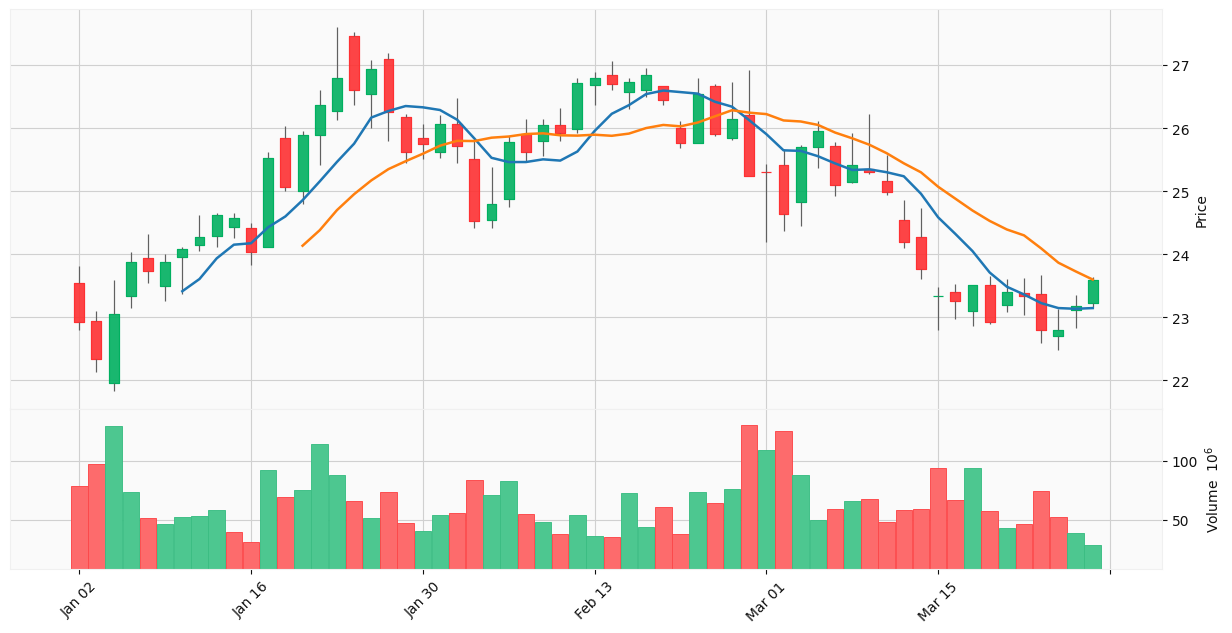

In [ ]:
mpf.plot(df_dados.head(60), type='candle', figsize = (16,8), volume=True, mav=(7,14), style='yahoo')

In [ ]:
#YF: API que contem dados de ações de bolsas abertas
#API: interface que conecta o código a alguma base de dados
df_dados_apple = yf.download('AAPL',start = '2023-01-01', end = '2023-12-31')
df_dados_apple

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166641,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735229,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261627,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


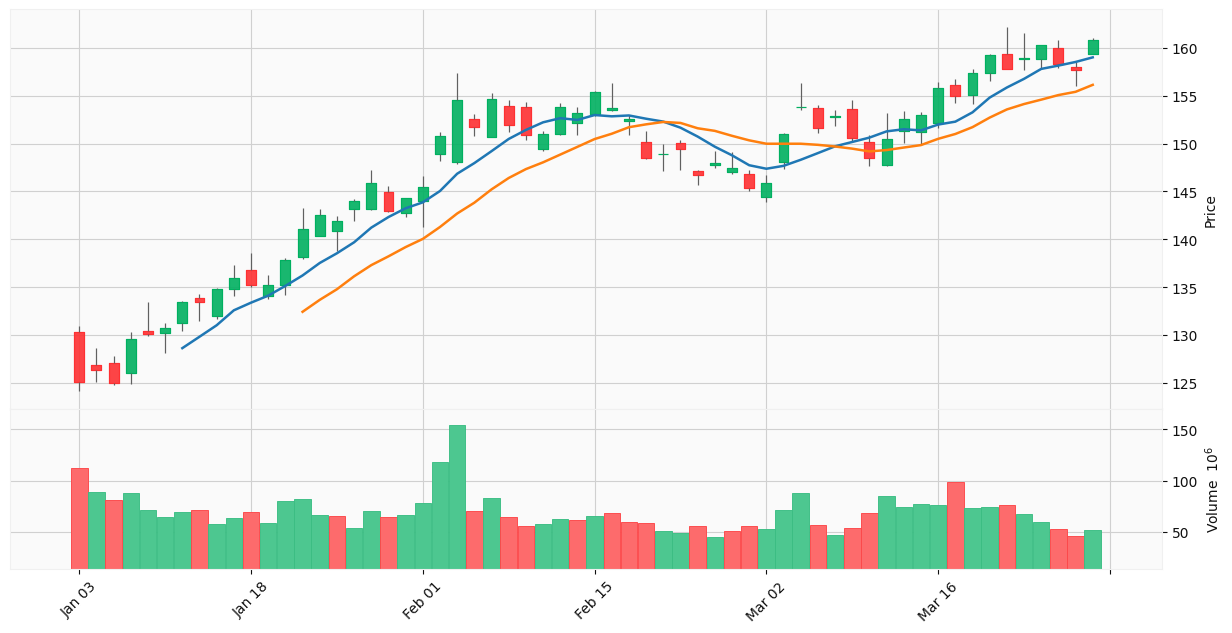

In [ ]:
mpf.plot(df_dados_apple.head(60), type='candle', figsize = (16,8), volume=True, mav=(7,14), style='yahoo')